### Lab Tasks
- In the dataframe creates in Lab 2 - Part a set ``Salary`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``MinMaxScaler`` to scale feature set X. 

### Data Preprocessing

In [19]:
import pandas as pd
import numpy as np
data = pd.read_csv('adult.csv')

In [20]:
data = data[data != ' ?']

C:\Users\saira\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [21]:
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

In [22]:
df = pd.get_dummies(data['marital-status'])
data = pd.concat([data, df], axis = 1)
data.drop('marital-status', axis = 1, inplace=True)

In [23]:
df = pd.get_dummies(data['relationship'])
data = pd.concat([data, df], axis = 1)
data.drop('relationship', axis = 1, inplace=True)

In [24]:
df = pd.get_dummies(data['race'])
data = pd.concat([data, df], axis = 1)
data.drop('race', axis = 1, inplace=True)

In [25]:
data.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Salary', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object')

In [26]:
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [27]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

In [28]:
y = data['Salary']
X = data.drop(['Salary'], axis = 1)

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Question 1
First train the following models on X_train and y_train. 
- Linear support vector machine with default parameters. 
- decision tree with ``max_depth = 3``
- K neighbors classifier with ``n_neighbors = 5``.

In the all above models, set ``random_sate = 0``.
Compute the test precision score of hard-voting classifier? (two significant digits)

In [40]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
svc_clf = SVC(random_state=0)
svc_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(max_depth = 3,random_state=0)
dt_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('svc', svc_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (svc_clf, dt_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


SVC 0.8405601277484338
DecisionTreeClassifier 0.8422798182041519
KNeighborsClassifier 0.8223805429308438
VotingClassifier 0.8432624984645621


In [37]:
from sklearn.metrics import precision_score
print(clf.__class__.__name__, precision_score(y_test, y_pred))

VotingClassifier 0.7569141193595342


#### Question 2
First train the following models on X_train and y_train. 
- Support vector machine with kernel 'rbf' and default parameters. 
- Decision tree with ``max_depth = 3``
- Logistic regression with default parameters.

In the all above models, set ``random_sate = 0``.
Compute the test recall score of soft-voting classifier? (two significant digits)

In [45]:
svc_clf = SVC(kernel='rbf',random_state=0,probability = True)
svc_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(max_depth = 3,random_state=0)
dt_clf.fit(X_train, y_train)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('svc', svc_clf), ('dt', dt_clf), ('lr', lr_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (svc_clf, dt_clf, lr_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8405601277484338
DecisionTreeClassifier 0.8422798182041519
LogisticRegression 0.8421569831716006
VotingClassifier 0.8467018793759981


In [48]:
from sklearn.metrics import recall_score
print(clf.__class__.__name__, recall_score(y_test, y_pred))

VotingClassifier 0.5353178607467205


#### Question 3
Train a bagging classifier on base model logistic regression with default parameters. Set the hyper-parameter as follow: 
```Python
n_estimators = 100
max_samples = 500
max_features = 5
random_state = 0```
What is out of bag score? (two significant digits)

In [50]:
from sklearn.ensemble import BaggingClassifier

log_clf = LogisticRegression(random_state=0)

bag_clf = BaggingClassifier(log_clf, n_estimators=100,max_samples = 500,bootstrap=True,max_features = 5, n_jobs=-1, oob_score=True, random_state=0)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.7627354627354628

#### Question 4
Use a grid search to find the best parameters of a random forest machine learning model on this dataset. 
```Python 
max_depth in [1, 3, 5, 7]
max_features in [5, 7, 9]
n_estimators in [100, 200, 500]
random_state = 0
cv = 5```

What are the best parameters of the model? 

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 0)
param_grid = {'max_depth': [1, 3, 5, 7], 'max_features': [5, 7, 9],'n_estimators':[100, 200, 500]}

In [55]:
rf_clf = GridSearchCV(random_forest, param_grid,cv=5)
rf_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7], 'max_features': [5, 7, 9],
                         'n_estimators': [100, 200, 500]})

In [56]:
rf_clf.best_params_

{'max_depth': 7, 'max_features': 9, 'n_estimators': 100}

#### Question 5
Train a random forest machine learning model on this dataset using the best parameters in the previous question. 

Which feature has the highest importance? 

In [57]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth = 7, max_features=9, random_state=0)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [59]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth = 7, max_features=9, random_state=0)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=9, random_state=0)

In [64]:
rf = RandomForestClassifier(max_depth=7, max_features=9, random_state=0)
rf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.861
Accuracy on test set: 0.856


In [75]:
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Salary,Divorced,Married-AF-spouse,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,0,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,0,40,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,1,0,0,1,0,0


<IPython.core.display.Javascript object>


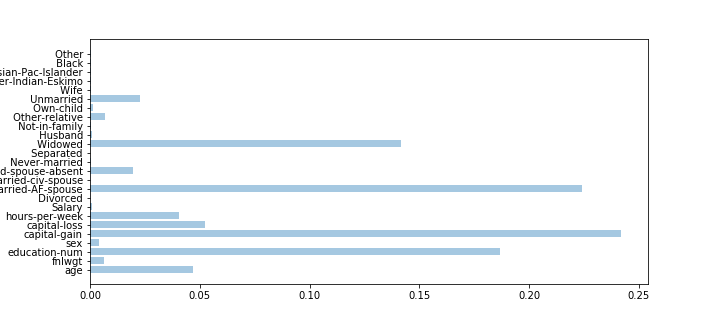

([<matplotlib.axis.YTick at 0x2949cf89888>,
 <a list of 25 Text yticklabel objects>)

In [76]:
%matplotlib notebook

y_list = rf.feature_importances_
y_pos = np.arange(len(y_list))
features = data.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)